# Пелевин RNN - чистка и препроцессинг текста

In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка текста

In [2]:
with open('pelevin-all.txt', encoding='utf-8-sig') as input_file:
    texts = input_file.read()[:-1].split('\n')

In [3]:
print(len(texts))

76275


In [4]:
texts[:10]

['Колдун Игнат и люди',
 'Сказочка',
 '4 мая 1912 года к колдуну Игнату пришел в гости протоиерей Арсеникум. Пока Игнат хлопотал с самоваром, доставал пряники, гость сморкался у вешалки, долго снимал калоши, крестился и вздыхал. Потом сел на краешек табурета, достал из-под рясы папку красного картона, раскрыл и развязно сказал Игнату:',
 '–\xa0Глянь-ка, чего я понаписал!',
 '–\xa0Интересно,\xa0– сказал Игнат, беря первый лист,\xa0– вслух читать?',
 '–\xa0Что ты!\xa0– испугано зашипел протоиерей.\xa0– Про себя!',
 'Игнат стал читать:',
 '«ОТКРОВЕНИЕ СВ. ФЕОКТИСТА»',
 '–\xa0«Люди!\xa0– сказал св. Феоктист, потрясая узловатым посохом.\xa0– Христос явился мне, истинно так. Он велел пойти к вам и извиниться. Ничего не вышло».',
 '–\xa0Ха-ха-ха!\xa0– засмеялся Игнат, а сам подумал: «Неспроста это». Но виду не подал.']

### Замена спец. символов

In [5]:
for i, string in enumerate(texts):
    texts[i] = string.replace(u'\xa0', u' ').replace(u'\ufeff', u'')

In [6]:
texts[:20]

['Колдун Игнат и люди',
 'Сказочка',
 '4 мая 1912 года к колдуну Игнату пришел в гости протоиерей Арсеникум. Пока Игнат хлопотал с самоваром, доставал пряники, гость сморкался у вешалки, долго снимал калоши, крестился и вздыхал. Потом сел на краешек табурета, достал из-под рясы папку красного картона, раскрыл и развязно сказал Игнату:',
 '– Глянь-ка, чего я понаписал!',
 '– Интересно, – сказал Игнат, беря первый лист, – вслух читать?',
 '– Что ты! – испугано зашипел протоиерей. – Про себя!',
 'Игнат стал читать:',
 '«ОТКРОВЕНИЕ СВ. ФЕОКТИСТА»',
 '– «Люди! – сказал св. Феоктист, потрясая узловатым посохом. – Христос явился мне, истинно так. Он велел пойти к вам и извиниться. Ничего не вышло».',
 '– Ха-ха-ха! – засмеялся Игнат, а сам подумал: «Неспроста это». Но виду не подал.',
 '– А есть еще? – спросил он вместо этого.',
 '– Ага! – протоиерей дал Игнату новый листок и тот прочел:',
 '«КАК МИХАИЛ ИВАНЫЧ С УМА СОШЕЛ И УМЕР»',
 '«Куда бы я ни пошел, – подумал Михаил Иваныч, с удивлением с

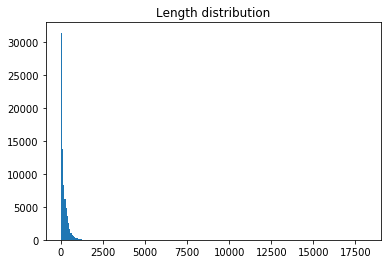

In [7]:
plt.title('Length distribution')
plt.hist(list(map(len, texts)), bins=256);

### Обрезка слишком длинных предложений

In [8]:
MAX_LEN = 800

# Crop sentences with length > 800
for i in range(len(texts)):
    if len(texts[i]) > MAX_LEN:
        texts[i] = texts[i][:MAX_LEN]
        if '.' not in texts[i]:
            continue
        while True:
            if texts[i][-1] in '.?!…':
                break
            else:
                texts[i] = texts[i][:-1]

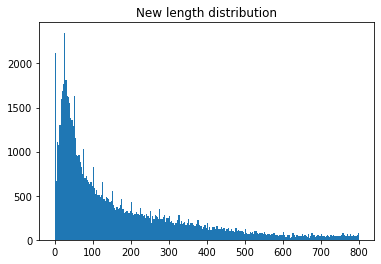

In [9]:
plt.title('New length distribution')
plt.hist(list(map(len, texts)), bins=256);

In [10]:
texts[:20]

['Колдун Игнат и люди',
 'Сказочка',
 '4 мая 1912 года к колдуну Игнату пришел в гости протоиерей Арсеникум. Пока Игнат хлопотал с самоваром, доставал пряники, гость сморкался у вешалки, долго снимал калоши, крестился и вздыхал. Потом сел на краешек табурета, достал из-под рясы папку красного картона, раскрыл и развязно сказал Игнату:',
 '– Глянь-ка, чего я понаписал!',
 '– Интересно, – сказал Игнат, беря первый лист, – вслух читать?',
 '– Что ты! – испугано зашипел протоиерей. – Про себя!',
 'Игнат стал читать:',
 '«ОТКРОВЕНИЕ СВ. ФЕОКТИСТА»',
 '– «Люди! – сказал св. Феоктист, потрясая узловатым посохом. – Христос явился мне, истинно так. Он велел пойти к вам и извиниться. Ничего не вышло».',
 '– Ха-ха-ха! – засмеялся Игнат, а сам подумал: «Неспроста это». Но виду не подал.',
 '– А есть еще? – спросил он вместо этого.',
 '– Ага! – протоиерей дал Игнату новый листок и тот прочел:',
 '«КАК МИХАИЛ ИВАНЫЧ С УМА СОШЕЛ И УМЕР»',
 '«Куда бы я ни пошел, – подумал Михаил Иваныч, с удивлением с

In [11]:
# Check
print(len(texts))

76275


### Сохранение обработанного текста

In [12]:
with open('pelevin-all_prepared.txt', 'w') as t_file:
    t_file.writelines(line + '\n' for line in texts)

### Создание и сохраение списка токенов

In [13]:
tokens = sorted(list(set(''.join(texts))))
token_to_id = {token: idx for idx, token in enumerate(tokens)}
num_tokens = len(tokens)

In [14]:
print(len(tokens))
print(tokens)

214
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '©', '«', '®', '°', '»', 'À', 'É', 'Ñ', 'Ø', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ë', 'ï', 'ó', 'ø', 'ü', 'ň', '́', 'α', 'γ', 'ε', 'μ', 'ς', 'σ', 'τ', 'Ё', 'Є', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'є', 'і', 'ї', 'ѣ', 'ה', 'ו', 'ז', 'ח', 'י',

In [15]:
with open('tokens.txt', 'w') as t_file:
    t_file.write(''.join(tokens))

### Вычисление и схоранение вероятностей начала предложений (букв)

In [16]:
start_probs = {}
for text in texts:
    start_symbol = text[0] if len(text) > 0 else ''
    if start_symbol not in start_probs:
        start_probs[start_symbol] = 1
    else:
        start_probs[start_symbol] += 1
start_list = sorted(list(start_probs.items()), key=lambda el: el[1], reverse=True)
print(start_list)

[('—', 18676), ('–', 15963), ('В', 3572), ('Н', 3085), ('С', 3032), ('П', 2898), ('О', 2820), ('К', 2294), ('Я', 2285), ('М', 1933), ('Т', 1845), ('', 1664), ('«', 1554), ('И', 1456), ('[', 1308), ('Д', 1283), ('А', 1169), ('Э', 964), ('Г', 952), ('Ч', 807), ('З', 760), ('У', 675), ('Б', 664), ('Л', 612), ('Р', 535), ('Е', 476), ('Ш', 238), ('Х', 230), ('Ж', 218), ('*', 216), ('Ф', 180), ('Ю', 170), ('1', 163), ('"', 151), ('3', 87), ('2', 83), ('I', 61), ('4', 59), ('L', 56), ('A', 39), ('Ц', 38), ('5', 33), ('…', 33), ('6', 32), ('(', 32), ('н', 29), ('H', 29), ('X', 29), ('“', 29), ('и', 28), ('S', 27), ('7', 26), ('T', 26), ('п', 25), ('D', 24), ('8', 22), ('9', 22), ('г', 22), ('в', 22), ('м', 21), ('P', 21), ('с', 20), ('W', 19), ('V', 18), ('B', 18), ('M', 18), ('C', 18), ('G', 17), ('.', 17), ('б', 16), ('к', 15), ('E', 14), ('$', 14), ('Щ', 13), ('т', 13), ('у', 11), ('0', 11), ('R', 11), ('O', 10), ('F', 10), ('о', 9), ('J', 9), ('ч', 8), ('э', 8), ('р', 8), ('t', 8), ('„', 8

In [17]:
with open('start_of_sentences.txt', 'w') as s_file:
    for s in start_list:
        s_file.writelines(s[0] + '_' + str(s[1]) + '\n')